# STC Jawwy

In [1]:
"""
Here we install libraries that are not installed by default
Example:  pyslsb
Feel free to add any library you are planning to use.
"""
!pip install pyxlsb

In [2]:
# Import the required libraries
"""
Please feel free to import any required libraries as per your needs
"""
import pandas as pd     # provides high-performance, easy to use structures and data analysis tools
import pyxlsb           # Excel extention to read xlsb files (the input file)
import numpy as np      # provides fast mathematical computation on arrays and matrices

# Jawwy dataset
The dataset consists of details about each customer and the movies and/or tv shows watched in addition to the genre.

You are required to work on task three to build a recommendation engine for our platform to Recommend movies to usesrs that they might be interested in¶


In [3]:
dataframe = pd.read_excel("/content/stc TV Data Set_T3.xlsx",index_col=0)
# Please make a copy of dataset if you are going to work directly and make changes on the dataset
# you can use   df=dataframe.copy()

In [4]:
# check the data shape
dataframe.shape

(1048575, 5)

In [5]:
# display the first 5 rows
dataframe.head()

,user_id_maped,program_name,rating,date_,program_genre
0,26138,100 treets,1,2017-05-27,Drama
1,7946,Moana,1,2017-05-21,Animation
2,7418,The Mermaid Princess,1,2017-08-10,Animation
3,19307,The Mermaid Princess,2,2017-07-26,Animation
4,15860,Churchill,2,2017-07-07,Biography


In [6]:
# describe the numeric values in the dataset
dataframe.describe()

,user_id_maped,rating,date_
count,1.048575e+06,1.048575e+06,1048575
mean,1.709266e+04,2.497283e+00,2017-10-04 00:23:20.346183936
min,1.000000e+00,1.000000e+00,2017-03-14 00:00:00
25%,8.253000e+03,1.000000e+00,2017-06-10 00:00:00
50%,1.714900e+04,2.000000e+00,2017-10-14 00:00:00
75%,2.566500e+04,3.000000e+00,2018-01-21 00:00:00
max,3.428000e+04,4.000000e+00,2018-04-30 00:00:00
std,1.003513e+04,1.119837e+00,NaN


In [7]:
# check if any column has null value in the dataset
dataframe.isnull().any()

,0
user_id_maped,False
program_name,False
rating,False
date_,False
program_genre,False


In [8]:
# we import Visualization libraries
# you can ignore and use any other graphing libraries
import matplotlib.pyplot as plt # a comprehensive library for creating static, animated, and interactive visualizations
import plotly #a graphing library makes interactive, publication-quality graphs. Examples of how to make line plots, scatter plots, area charts, bar charts, error bars, box plots, histograms, heatmaps, subplots, multiple-axes, polar charts, and bubble charts.
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [14]:
"""
TODO build your Recommender system to Highlight Programs that usesrs might be interested in
"""

'\nTODO build your Recommender system to Highlight Programs that usesrs might be interested in\n'

In [9]:
!pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 9.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp311-cp311-linux_x86_64.whl size=2505177 sha256=4300a786eb02a4add50194fea5f6280af47cf6ef771e62d3ba68a4fc78cb2519
  Stored in directory: /root/.cache/pip/wheels/2a/8f/6e/7e2899163e2d85d8266daab4aa1cdabec7a6c56f83c015b5af
Successfully built scikit-surprise


In [10]:
!pip install surprise

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split

In [14]:
rating_threshold = 3  # Ratings 3 and above indicate a liked program

def user_likes_program(row):
    return 1 if row['rating'] >= rating_threshold else 0

dataframe['liked'] = dataframe.apply(user_likes_program, axis=1)

In [15]:
# Content-based recommendation with optimized performance
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
unique_genres = dataframe[['program_name', 'program_genre']].drop_duplicates(subset=['program_name'])
program_tfidf = vectorizer.fit_transform(unique_genres['program_genre'].astype(str)).astype(np.float32)
cosine_sim = cosine_similarity(program_tfidf)

In [16]:
# Recommendation function based on similarity
def recommend_programs(program_name, dataframe, cosine_sim):
    idx = dataframe[dataframe['program_name'] == program_name].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:6]
    program_indices = [i[0] for i in sim_scores]
    return unique_genres['program_name'].iloc[program_indices]

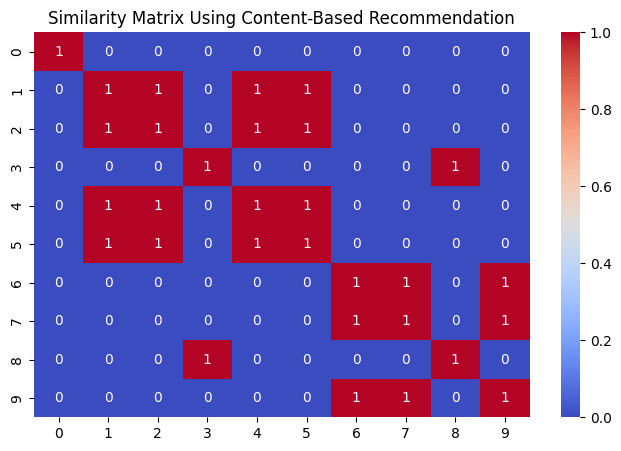

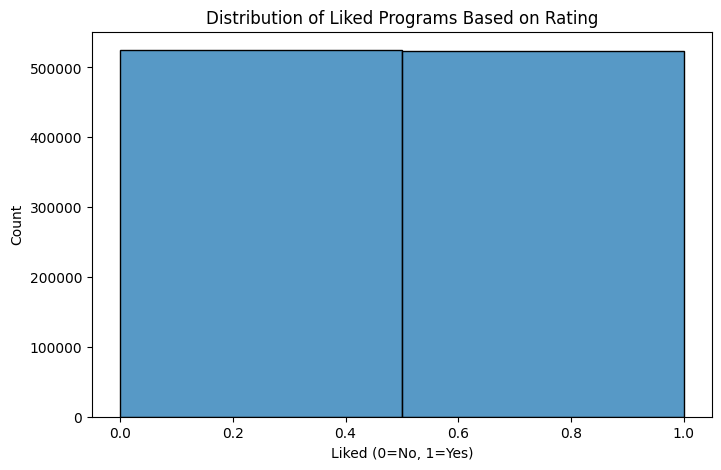

In [17]:
# Collaborative filtering using rating as a measure of liking
reader = Reader(rating_scale=(0, 1))  # Since we now use a binary "liked" column
data = Dataset.load_from_df(dataframe[['user_id_maped', 'program_name', 'liked']], reader)
trainset, testset = train_test_split(data, test_size=0.2)
model = SVD()
model.fit(trainset)

# Display visualizations
plt.figure(figsize=(8, 5))
sns.heatmap(cosine_sim[:10, :10], annot=True, cmap='coolwarm')
plt.title('Similarity Matrix Using Content-Based Recommendation')
plt.show()

plt.figure(figsize=(8, 5))
sns.histplot(dataframe['liked'], bins=2, kde=False)
plt.title('Distribution of Liked Programs Based on Rating')
plt.xlabel('Liked (0=No, 1=Yes)')
plt.ylabel('Count')
plt.show()

In [18]:
# Show top 5 recommendations for people who watched "Moana"
recommendations = recommend_programs("Moana", dataframe, cosine_sim)

# Calculate the most-watched programs based on rating count
program_watch_count = dataframe['program_name'].value_counts().reset_index()
program_watch_count.columns = ['program_name', 'watch_count']
program_watch_count = program_watch_count.head(10)

# Display the most-watched programs
print("Top 10 Most Watched Programs Based on Rating Count:")
print(program_watch_count)

print("Top 5 Recommendations for People Who Watched Moana:")
print(recommendations)

Top 10 Most Watched Programs Based on Rating Count:
                            program_name  watch_count
0                          The Boss Baby        24047
1                                  Pingu        17063
2                                 Trolls        13793
3    The Adventures of Petey and Friends         9612
4                                  Moana         8081
5                   The Mermaid Princess         7525
6                               Baywatch         7436
7                          Oscar's Oasis         7174
8                              Ferdinand         6817
9  An Inconvenient equel: Truth to Power         6342
Top 5 Recommendations for People Who Watched Moana:
2                The Mermaid Princess
5     Beavis And Butt-Head Do America
7                                Coco
21              Surf's Up : WaveMania
28                             Trolls
Name: program_name, dtype: object


<ipython-input-19-307a2de133bd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=recommendations.values, x=np.arange(1, 6), palette='viridis')


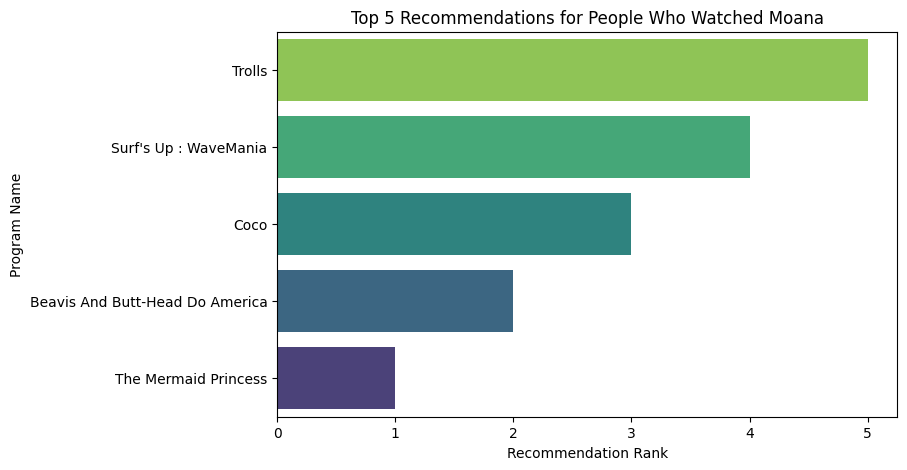

In [19]:
# Plot Top 5 Recommendations
plt.figure(figsize=(8, 5))
sns.barplot(y=recommendations.values, x=np.arange(1, 6), palette='viridis')
plt.xlabel('Recommendation Rank')
plt.ylabel('Program Name')
plt.title('Top 5 Recommendations for People Who Watched Moana')
plt.gca().invert_yaxis()
plt.show()